In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# 1: Import libraries

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
# 2: Create the 15-tweet dataset

data = pd.DataFrame({
    "content": [
        "AI is transforming the way we work and live.",
        "ChatGPT is a powerful AI language model developed by OpenAI.",
        "Artificial intelligence helps automate repetitive tasks.",
        "Machine learning is a core component of AI systems.",
        "Deep learning allows AI to recognize patterns in data.",
        "OpenAI continuously improves ChatGPT with new updates.",
        "AI can generate text, answer questions, and provide recommendations.",
        "Natural language processing enables computers to understand human language.",
        "ChatGPT can assist students, professionals, and researchers.",
        "Businesses are using AI tools like ChatGPT for customer support.",
        "AI research focuses on ethics, fairness, and safety.",
        "Language models like ChatGPT learn from vast amounts of text data.",
        "AI and machine learning are driving innovation across industries.",
        "Developers can integrate AI models into applications via APIs.",
        "Understanding AI requires knowledge of algorithms, data, and models."
    ]
})

In [4]:
# 3: Combine all tweets into a single text
article_text = " ".join(data["content"].astype(str))

In [5]:
# 4: Text Cleaning
processed_text = article_text.lower()  # lowercase
processed_text = re.sub('[^a-zA-Z]', ' ', processed_text)  # remove punctuation/numbers
processed_text = re.sub(r'\s+', ' ', processed_text)  # remove extra spaces

In [6]:
# 5: Tokenization and Stopword Removal

nltk.download('punkt')
nltk.download('stopwords')

# Tokenize sentences
sentences = nltk.sent_tokenize(processed_text)

# Tokenize words in each sentence
words = [nltk.word_tokenize(sent) for sent in sentences]

# Remove stopwords
stop_words = set(stopwords.words('english'))
clean_words = []
for sent in words:
    clean_sent = [w for w in sent if w not in stop_words]
    clean_words.append(clean_sent)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Step 6: Word2Vec Training

model = Word2Vec(sentences=clean_words, vector_size=50, window=3, min_count=1, workers=2)
model.train(clean_words, total_examples=model.corpus_count, epochs=model.epochs)

(173, 505)

In [8]:
# 7: Demo Vector Output

demo_word = "ai"
if demo_word in model.wv:
    demo_vector = model.wv[demo_word]
    print(f"Vector for '{demo_word}':\n", demo_vector)
    print("Shape:", demo_vector.shape)

Vector for 'ai':
 [-0.00103019  0.00043431  0.01005562  0.01828523 -0.01872372 -0.01440957
  0.01312491  0.01824073 -0.01027128 -0.00757274  0.01466691 -0.00319589
 -0.00897254  0.01349374 -0.0097941  -0.0033181   0.00611263  0.00216332
 -0.0168591  -0.01914776  0.01475406  0.01034863  0.01377455  0.0015118
  0.01304583 -0.00672515 -0.00210046  0.01169073 -0.0150704  -0.00775076
 -0.01489108 -0.0019779   0.01930053 -0.01491998 -0.00479967 -0.00373896
  0.01637983 -0.0119998   0.00027307 -0.00962471 -0.01920346  0.00989878
 -0.01746352 -0.008828    0.00023493 -0.00066401 -0.01554193  0.0190484
  0.01007564  0.01869814]
Shape: (50,)


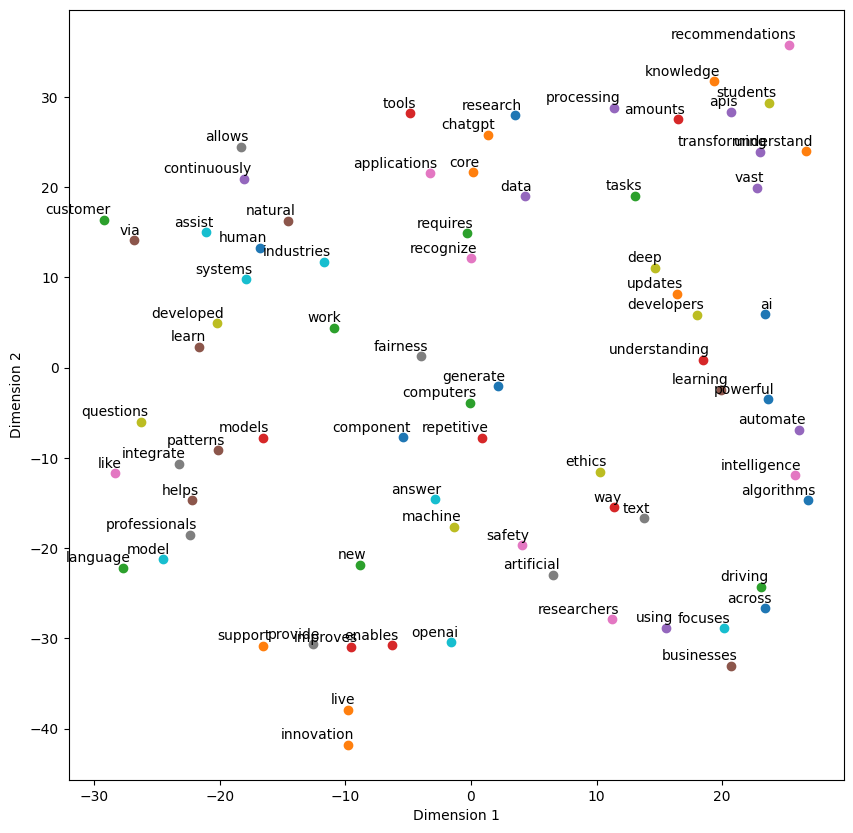

In [9]:
# 8: t-SNE Plot
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(model):
    labels = []
    tokens = []

    # Extract word vectors
    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)

    # Convert to NumPy array
    tokens = np.array(tokens)

    # t-SNE with small perplexity
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', random_state=42, learning_rate='auto')
    new_values = tsne_model.fit_transform(tokens)

    x = new_values[:, 0]
    y = new_values[:, 1]

    plt.figure(figsize=(10, 10))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

tsne_plot(model)